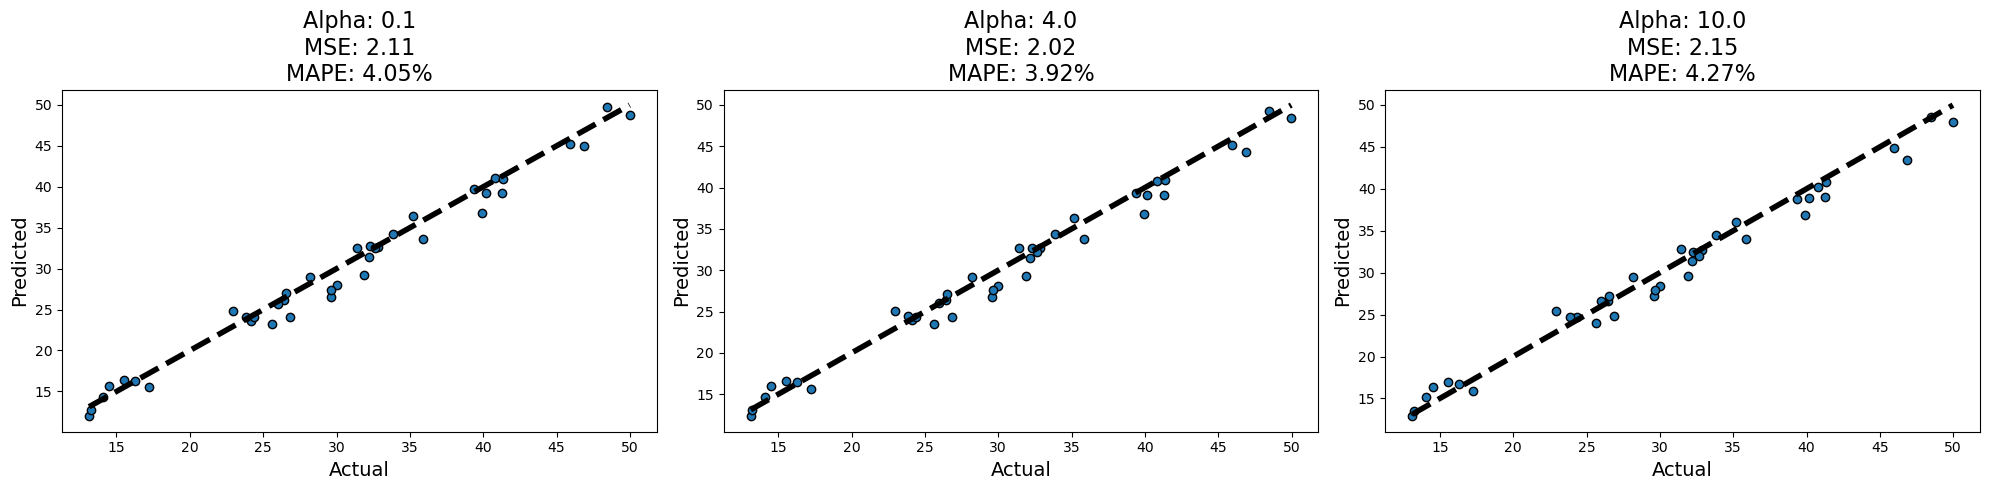

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("61761_Real_Time.csv")

# Filter data for Mondays in July for the years 2020 and 2021
sunday_data = df[(df['Month'] == 7) & (df['Day_of_Week'] == 7) & (df['Year'].isin([2020, 2021]))]

# Prepare the feature matrix X and the target variable y
features = ['Hour', 'Marginal Cost Losses','Marginal Cost Congestion']
X = sunday_data[features].values
y = sunday_data['LBMP'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the model for different alpha values
alphas = [0.1, 4.0, 10.0]
fig, axs = plt.subplots(1, len(alphas), figsize=(20, 5))

for alpha, ax in zip(alphas, axs):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # MAPE in percentage
    
    # Scatter plot of true vs predicted values
    ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Actual', fontsize=14)
    ax.set_ylabel('Predicted', fontsize=14)
    ax.set_title(f'Alpha: {alpha}\nMSE: {mse:.2f}\nMAPE: {mape:.2f}%', fontsize=16)

#plt.suptitle('Ridge Regression with Different Alpha Values')
plt.tight_layout()
plt.show()


In [11]:
#CREATE AND TRAIN MODEL     DAY AHEAD Trained on REAL - TIME
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import joblib

# Load your data
df = pd.read_csv("61761_Real_Time.csv")

# Filter data for Mondays in July for the years 2020 and 2021
sunday_data = df[(df['Month'] == 7) & (df['Day_of_Week'] == 7) & (df['Year'].isin([2020, 2021]))]

# Prepare the feature matrix X and the target variable y
features = ['Hour', 'Marginal Cost Losses', 'Marginal Cost Congestion']
X = sunday_data[features].values
y = sunday_data['LBMP'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Ridge regression model
ridge = Ridge(alpha=4.0)  # You can adjust the alpha parameter for regularization
ridge.fit(X_train, y_train)

# Save the scaler and model
joblib.dump(scaler, 'RRMP_scaler.pkl')
joblib.dump(ridge, 'RRMP_model.pkl')

# Evaluate the model
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # MAPE as percentage

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Squared Error (MSE): 2.0226302816060526
Mean Absolute Error (MAE): 1.1065102366118962
Mean Absolute Percentage Error (MAPE): 3.9224657771935423%


Training sizes: [ 15  30  45  61  76  91 107 122 137 153]
Training errors (mean ± std):
8.7666 ± 0.3724
6.6678 ± 0.9503
4.2948 ± 0.6865
3.5311 ± 0.3911
2.9089 ± 0.3621
2.6820 ± 0.1987
2.3183 ± 0.2116
2.3882 ± 0.0438
2.2689 ± 0.0690
3.1658 ± 0.6009
Validation errors (mean ± std):
185.7786 ± 165.7680
87.8907 ± 77.3032
29.9481 ± 17.0849
21.5529 ± 13.8154
12.8544 ± 7.4083
6.4724 ± 3.0544
5.4708 ± 2.9295
5.0726 ± 2.9423
4.4183 ± 2.7736
5.8401 ± 3.6274


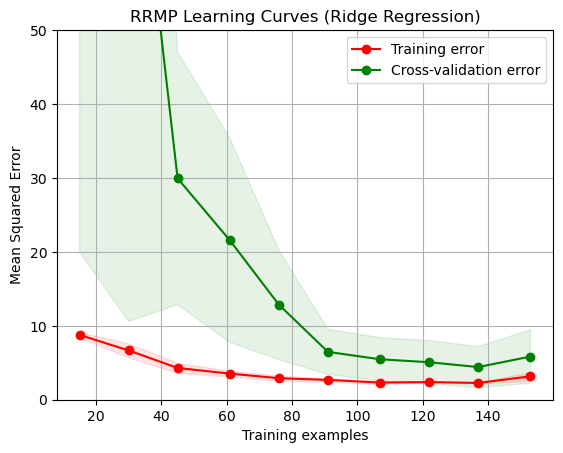

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("61761_Real_Time.csv")

# Filter data for Mondays in January for the years 2020 and 2021
sunday_data = df[(df['Month'] == 7) & (df['Day_of_Week'] == 7) & (df['Year'].isin([2020, 2021]))]

# Prepare the feature matrix X and the target variable y
features = ['Hour', 'Marginal Cost Losses', 'Marginal Cost Congestion']
X = sunday_data[features].values
y = sunday_data['LBMP'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train the Ridge regression model
ridge = Ridge(alpha=4.0)  # You can adjust the alpha parameter for regularization

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    ridge, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Print the values used in the chart
print("Training sizes:", train_sizes)
print("Training errors (mean ± std):")
for mean, std in zip(train_scores_mean, train_scores_std):
    print(f"{mean:.4f} ± {std:.4f}")

print("Validation errors (mean ± std):")
for mean, std in zip(test_scores_mean, test_scores_std):
    print(f"{mean:.4f} ± {std:.4f}")

# Plot the learning curves
plt.figure()
plt.title("RRMP Learning Curves (Ridge Regression)")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.ylim(0, 50)
plt.grid()

# Plot the average training and test errors
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training error")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation error")

plt.legend(loc="best")
plt.show()


In [73]:
#Generate 2022 Day_Ahead Predictions using Day_Ahead Data

import pandas as pd
import joblib
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Load your saved Ridge regression model
ridge_model = joblib.load('RRMP_model.pkl')

# Load the scaler used during training
scaler = joblib.load('RRMP_scaler.pkl')

# Load the dataset for July Sundays in 2022
daf = pd.read_csv("61761_Day_Ahead_NoLBMP.csv")
RRMP_2022 = daf[(daf['Year'] == 2022)]

# Prepare the feature matrix X
features = ['Hour', 'Marginal Cost Losses', 'Marginal Cost Congestion']
X = RRMP_2022[features].values

# Scale the features
X_scaled = scaler.transform(X)

# Make predictions using the loaded Ridge regression model
predictions_2022 = ridge_model.predict(X_scaled)

# Load the dataset with actual values
actual_df = pd.read_csv("61761_Real_Time.csv")
actual_df = actual_df[(actual_df['Year'] == 2022)]
actual_values = actual_df['LBMP'].values

# Ensure the dates and hours align for predictions and actuals
dates = RRMP_2022['Date'].values
hours = RRMP_2022['Hour'].values

# Calculate individual MAPE and prepare for saving to CSV
mape_list = []
hourly_mape_dict = {'Date': [], 'Hour': [], 'RRMP_Day_Ahead_Predict': [], 'Actual': [], 'RRMP_Day_Ahead_MAPE': []}

for date, hour, pred, actual in zip(dates, hours, predictions_2022, actual_values):
    individual_mape = np.abs(mean_absolute_percentage_error([actual], [pred])) * 100  # Ensure MAPE is positive
    mape_list.append(individual_mape)
    
    # Store results in dictionary for CSV creation
    hourly_mape_dict['Date'].append(date)
    hourly_mape_dict['Hour'].append(hour)
    hourly_mape_dict['RRMP_Day_Ahead_Predict'].append(pred)
    hourly_mape_dict['Actual'].append(actual)
    hourly_mape_dict['RRMP_Day_Ahead_MAPE'].append(individual_mape)

    print(f"Date: {date}, Hour: {hour}, RRMP_Predict: {pred:.2f}, Actual: {actual:.2f}, RRMP_MAPE: {individual_mape:.2f}%")

# Convert dictionary to DataFrame
df_hourly_mape = pd.DataFrame(hourly_mape_dict)

# Save DataFrame to CSV
df_hourly_mape.to_csv('RRMP_2022_Day_Ahead_Predictions.csv', index=False)
print("Hourly MAPE results saved to RRMP_2022_Day_Ahead_Predictions.csv.")


Date: 2022-01-01, Hour: 0, RRMP_Predict: 25.83, Actual: 28.26, RRMP_MAPE: 8.59%
Date: 2022-01-01, Hour: 1, RRMP_Predict: 23.23, Actual: 24.63, RRMP_MAPE: 5.68%
Date: 2022-01-01, Hour: 2, RRMP_Predict: 22.35, Actual: 26.48, RRMP_MAPE: 15.59%
Date: 2022-01-01, Hour: 3, RRMP_Predict: 22.07, Actual: 22.24, RRMP_MAPE: 0.77%
Date: 2022-01-01, Hour: 4, RRMP_Predict: 22.35, Actual: 27.10, RRMP_MAPE: 17.53%
Date: 2022-01-01, Hour: 5, RRMP_Predict: 23.25, Actual: 27.74, RRMP_MAPE: 16.18%
Date: 2022-01-01, Hour: 6, RRMP_Predict: 26.81, Actual: 27.51, RRMP_MAPE: 2.55%
Date: 2022-01-01, Hour: 7, RRMP_Predict: 26.81, Actual: 24.23, RRMP_MAPE: 10.67%
Date: 2022-01-01, Hour: 8, RRMP_Predict: 28.12, Actual: 17.53, RRMP_MAPE: 60.39%
Date: 2022-01-01, Hour: 9, RRMP_Predict: 27.47, Actual: 20.39, RRMP_MAPE: 34.70%
Date: 2022-01-01, Hour: 10, RRMP_Predict: 30.33, Actual: 29.89, RRMP_MAPE: 1.46%
Date: 2022-01-01, Hour: 11, RRMP_Predict: 30.48, Actual: 30.94, RRMP_MAPE: 1.49%
Date: 2022-01-01, Hour: 12, RRMP

In [77]:
#Generate 2022 SAME DAY Predictions using Real_Time Data

import pandas as pd
import joblib
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Load your saved Ridge regression model
ridge_model = joblib.load('RRMP_model.pkl')

# Load the scaler used during training
scaler = joblib.load('RRMP_scaler.pkl')

# Load the dataset for July Sundays in 2022
daf = pd.read_csv("61761_Real_Time_NoLBMP.csv")
RRMP_2022 = daf[(daf['Year'] == 2022)]

# Prepare the feature matrix X
features = ['Hour', 'Marginal Cost Losses', 'Marginal Cost Congestion']
X = RRMP_2022[features].values

# Scale the features
X_scaled = scaler.transform(X)

# Make predictions using the loaded Ridge regression model
predictions_2022 = ridge_model.predict(X_scaled)

# Load the dataset with actual values
actual_df = pd.read_csv("61761_Real_Time.csv")
actual_df = actual_df[(actual_df['Year'] == 2022)]
actual_values = actual_df['LBMP'].values

# Ensure the dates and hours align for predictions and actuals
dates = RRMP_2022['Date'].values
hours = RRMP_2022['Hour'].values

# Calculate individual MAPE and prepare for saving to CSV
mape_list = []
hourly_mape_dict = {'Date': [], 'Hour': [], 'RRMP_Same_Day_Predict': [], 'Actual': [], 'RRMP_Same_Day_MAPE': []}

for date, hour, pred, actual in zip(dates, hours, predictions_2022, actual_values):
    individual_mape = np.abs(mean_absolute_percentage_error([actual], [pred])) * 100  # Ensure MAPE is positive
    mape_list.append(individual_mape)
    
    # Store results in dictionary for CSV creation
    hourly_mape_dict['Date'].append(date)
    hourly_mape_dict['Hour'].append(hour)
    hourly_mape_dict['RRMP_Same_Day_Predict'].append(pred)
    hourly_mape_dict['Actual'].append(actual)
    hourly_mape_dict['RRMP_Same_Day_MAPE'].append(individual_mape)

    print(f"Date: {date}, Hour: {hour}, RRMP_Same_Day_Predict: {pred:.2f}, Actual: {actual:.2f}, RRMP_Same_Day_MAPE: {individual_mape:.2f}%")

# Convert dictionary to DataFrame
df_hourly_mape = pd.DataFrame(hourly_mape_dict)

# Save DataFrame to CSV
df_hourly_mape.to_csv('RRMP_2022_Same_Day_Predictions.csv', index=False)
print("Hourly MAPE results saved to RRMP_2022_Same_Day_Predictions.csv.")


Date: 2022-01-01, Hour: 0, RRMP_Same_Day_Predict: 20.13, Actual: 28.26, RRMP_Same_Day_MAPE: 28.75%
Date: 2022-01-01, Hour: 1, RRMP_Same_Day_Predict: 24.69, Actual: 24.63, RRMP_Same_Day_MAPE: 0.23%
Date: 2022-01-01, Hour: 2, RRMP_Same_Day_Predict: 24.56, Actual: 26.48, RRMP_Same_Day_MAPE: 7.26%
Date: 2022-01-01, Hour: 3, RRMP_Same_Day_Predict: 19.80, Actual: 22.24, RRMP_Same_Day_MAPE: 10.95%
Date: 2022-01-01, Hour: 4, RRMP_Same_Day_Predict: 19.72, Actual: 27.10, RRMP_Same_Day_MAPE: 27.24%
Date: 2022-01-01, Hour: 5, RRMP_Same_Day_Predict: 22.74, Actual: 27.74, RRMP_Same_Day_MAPE: 18.02%
Date: 2022-01-01, Hour: 6, RRMP_Same_Day_Predict: 23.13, Actual: 27.51, RRMP_Same_Day_MAPE: 15.90%
Date: 2022-01-01, Hour: 7, RRMP_Same_Day_Predict: 19.39, Actual: 24.23, RRMP_Same_Day_MAPE: 19.99%
Date: 2022-01-01, Hour: 8, RRMP_Same_Day_Predict: 14.98, Actual: 17.53, RRMP_Same_Day_MAPE: 14.52%
Date: 2022-01-01, Hour: 9, RRMP_Same_Day_Predict: 16.80, Actual: 20.39, RRMP_Same_Day_MAPE: 17.61%
Date: 2022-0

In [87]:
import pandas as pd
import numpy as np

# Load data
day_ahead_predictions = pd.read_csv('RRMP_2022_Day_Ahead_Predictions.csv')  # First prediction file
same_day_predictions = pd.read_csv('RRMP_2022_Same_Day_Predictions.csv')  # Second prediction file
iso_data = pd.read_csv('61761_ISO.csv')  # ISO data

# Convert 'Date' columns to datetime format in all dataframes
day_ahead_predictions['Date'] = pd.to_datetime(day_ahead_predictions['Date'])
same_day_predictions['Date'] = pd.to_datetime(same_day_predictions['Date'])
iso_data['Date'] = pd.to_datetime(iso_data['Date'])

# Filter ISO data for the year 2022
iso_data_2022 = iso_data[iso_data['Date'].dt.year == 2022]

# Merge the first two prediction datasets on 'Date' and 'Hour'
merged_predictions = pd.merge(day_ahead_predictions, same_day_predictions, on=['Date', 'Hour'], how='outer', suffixes=('_Day_Ahead', '_Same_Day'))

# Now merge the result with the ISO data on 'Date' and 'Hour'
final_merged_data = pd.merge(merged_predictions, iso_data_2022[['Date', 'Hour', 'LBMP']], on=['Date', 'Hour'], how='left')
final_merged_data.rename(columns={'LBMP': 'NYISO_Predict'}, inplace=True)

# Choose one 'Actual' column for MAPE calculation
# Here, we use 'Actual_Day_Ahead' for this example; adjust if needed
final_merged_data['Actual'] = final_merged_data['Actual_Day_Ahead']

# Calculate MAPE using the chosen 'Actual' column
final_merged_data['NYISO_MAPE'] = np.abs(final_merged_data['NYISO_Predict'] - final_merged_data['Actual']) / np.abs(final_merged_data['Actual']) * 100

# Drop the other 'Actual' columns
final_merged_data = final_merged_data.drop(columns=['Actual_Day_Ahead', 'Actual_Same_Day'])

# Drop duplicate columns if any
final_merged_data = final_merged_data.loc[:, ~final_merged_data.columns.duplicated()]

# Print the first few rows to verify correctness
print(final_merged_data.head())

# Save the final merged data to a new CSV file
final_merged_data.to_csv('RRMP_With_NYISO.csv', index=False)
print("Merged data with one 'Actual' column and MAPE saved to 'RRMP_With_NYISO.csv'.")


        Date  Hour  RRMP_Day_Ahead_Predict  RRMP_Day_Ahead_MAPE  \
0 2022-01-01     0               25.832832             8.588704   
1 2022-01-01     1               23.231112             5.679612   
2 2022-01-01     2               22.351689            15.590299   
3 2022-01-01     3               22.068567             0.770834   
4 2022-01-01     4               22.349122            17.530915   

   RRMP_Same_Day_Predict  RRMP_Same_Day_MAPE  NYISO_Predict  Actual  \
0              20.134854           28.751403          30.95   28.26   
1              24.687169            0.232113          28.25   24.63   
2              24.557921            7.258607          26.31   26.48   
3              19.804820           10.949549          25.29   22.24   
4              19.718823           27.236814          25.24   27.10   

   NYISO_MAPE  
0    9.518754  
1   14.697523  
2    0.641994  
3   13.714029  
4    6.863469  
Merged data with one 'Actual' column and MAPE saved to 'RRMP_With_NYISO.cs

In [90]:
# Assuming your dataset is loaded into a DataFrame named 'df'
df = pd.read_csv('RRMP_With_NYISO.csv')

# Filtering the DataFrame where MAPE_mdyN is less than MAPE_ISO
filtered_df = df[df['RRMP_Day_Ahead_MAPE'] < df['NYISO_MAPE']]

# Selecting only the specified columns
filtered_df = filtered_df[['Date', 'Hour', 'Actual', 'RRMP_Day_Ahead_Predict', 'RRMP_Day_Ahead_MAPE', 'NYISO_Predict', 'NYISO_MAPE']]

# Saving the filtered DataFrame to a CSV file
filtered_df.to_csv('RRMP_Beat_NYISO.csv', index=False)

print("Filtered data saved to RRMP_Beat_NYISO.csv")

Filtered data saved to RRMP_Beat_NYISO.csv


In [95]:
import pandas as pd

# Load the data from CSV
df = pd.read_csv('RRMP_Beat_NYISO.csv')

# Convert 'Date' column to datetime format if needed
df['Date'] = pd.to_datetime(df['Date'])

# Filter the data to include only the year 2022
df_2022 = df[df['Date'].dt.year == 2022]

# Ensure that MAPE values are positive
df_2022['RRMP_Day_Ahead_MAPE'] = df_2022['RRMP_Day_Ahead_MAPE'].abs()
df_2022['NYISO_MAPE'] = df_2022['NYISO_MAPE'].abs()

# Total hours in each month for a non-leap year
hours_in_month = {
    1: 31 * 24,  # January
    2: 28 * 24,  # February
    3: 31 * 24,  # March
    4: 30 * 24,  # April
    5: 31 * 24,  # May
    6: 30 * 24,  # June
    7: 31 * 24,  # July
    8: 31 * 24,  # August
    9: 30 * 24,  # September
    10: 31 * 24, # October
    11: 30 * 24, # November
    12: 31 * 24  # December
}

# Initialize dictionaries to store the number of hours where RRMP_Day_Ahead_MAPE < NYISO_MAPE
hours_better_than_nyiso_per_month = {}
total_hours_better_than_nyiso_year = 0

for month in range(1, 13):
    # Filter data for the current month
    monthly_data = df_2022[df_2022['Date'].dt.month == month]
    
    # Calculate the number of hours where RRMP_Day_Ahead_MAPE < NYISO_MAPE
    hours_better_than_nyiso = monthly_data[monthly_data['RRMP_Day_Ahead_MAPE'] < monthly_data['NYISO_MAPE']].shape[0]
    
    # Calculate the total hours for the current month
    total_hours_month = hours_in_month[month]
    
    # Calculate the percentage of hours where RRMP_Day_Ahead_MAPE is less than NYISO_MAPE
    percentage_hours = (hours_better_than_nyiso / total_hours_month) * 100
    hours_better_than_nyiso_per_month[month] = percentage_hours
    
    # Accumulate total hours better than NYISO for the year
    total_hours_better_than_nyiso_year += hours_better_than_nyiso

# Calculate the percentage of hours for the entire year
total_possible_hours_2022 = sum(hours_in_month.values())
yearly_percentage = (total_hours_better_than_nyiso_year / total_possible_hours_2022) * 100

# Print the results for each month
for month, percentage in hours_better_than_nyiso_per_month.items():
    print(f"Percentage of hours in month {month} where RRMP_Day_Ahead_MAPE < NYISO_MAPE in 2022: {percentage:.2f}%")

# Print the yearly percentage
print(f"Yearly Percentage of hours where RRMP_Day_Ahead_MAPE < NYISO_MAPE in 2022: {yearly_percentage:.2f}%")


Percentage of hours in month 1 where RRMP_Day_Ahead_MAPE < NYISO_MAPE in 2022: 37.63%
Percentage of hours in month 2 where RRMP_Day_Ahead_MAPE < NYISO_MAPE in 2022: 56.25%
Percentage of hours in month 3 where RRMP_Day_Ahead_MAPE < NYISO_MAPE in 2022: 50.40%
Percentage of hours in month 4 where RRMP_Day_Ahead_MAPE < NYISO_MAPE in 2022: 53.61%
Percentage of hours in month 5 where RRMP_Day_Ahead_MAPE < NYISO_MAPE in 2022: 51.48%
Percentage of hours in month 6 where RRMP_Day_Ahead_MAPE < NYISO_MAPE in 2022: 40.97%
Percentage of hours in month 7 where RRMP_Day_Ahead_MAPE < NYISO_MAPE in 2022: 41.67%
Percentage of hours in month 8 where RRMP_Day_Ahead_MAPE < NYISO_MAPE in 2022: 40.46%
Percentage of hours in month 9 where RRMP_Day_Ahead_MAPE < NYISO_MAPE in 2022: 49.03%
Percentage of hours in month 10 where RRMP_Day_Ahead_MAPE < NYISO_MAPE in 2022: 42.20%
Percentage of hours in month 11 where RRMP_Day_Ahead_MAPE < NYISO_MAPE in 2022: 56.25%
Percentage of hours in month 12 where RRMP_Day_Ahead

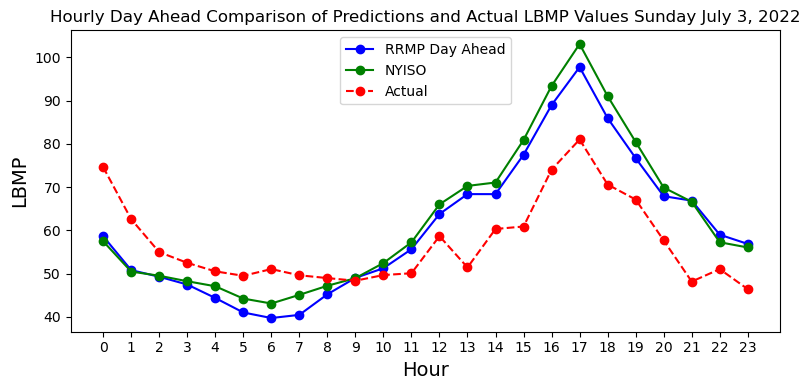

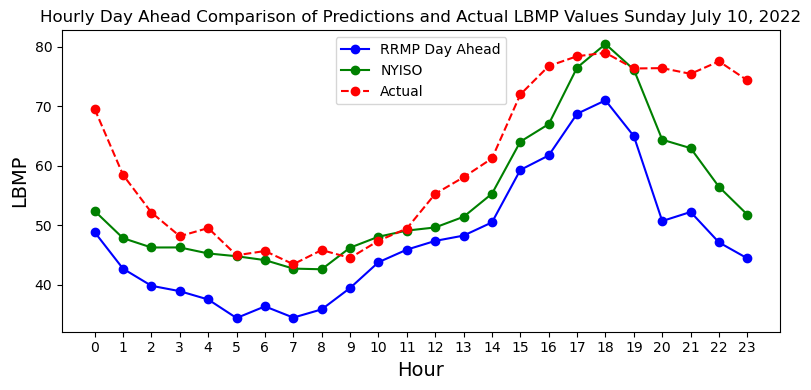

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('RRMP_With_NYISO.csv')
data = df[(df['Date'] == '2022-07-03')]

# Extract relevant columns
hours = data['Hour']
RRMP_predictions = data['RRMP_Day_Ahead_Predict']
ISO_predictions = data['NYISO_Predict']
actual_values = data['Actual']


# Plotting
plt.figure(figsize=(8, 4))

# Plot predictions with solid lines
plt.plot(hours, RRMP_predictions, marker='o', linestyle='-', color='b', label='RRMP Day Ahead')
plt.plot(hours, ISO_predictions, marker='o', linestyle='-', color='g', label='NYISO')

# Plot actual values with dashed line
plt.plot(hours, actual_values, marker='o', linestyle='--', color='r', label='Actual')

# Add labels and title
plt.xlabel('Hour',fontsize=14)
plt.ylabel('LBMP',fontsize=14)
plt.title('Hourly Day Ahead Comparison of Predictions and Actual LBMP Values Sunday July 3, 2022')
plt.xticks(hours)
plt.legend(loc='upper center')  # Adjust legend position as needed

# Customize plot
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().set_facecolor('white')
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()


df= pd.read_csv('RRMP_With_NYISO.csv')
data = df[(df['Date'] == '2022-07-10')]

# Extract relevant columns
hours = data['Hour']
RRMP_predictions = data['RRMP_Day_Ahead_Predict']
ISO_predictions = data['NYISO_Predict']
actual_values = data['Actual']


# Plotting
plt.figure(figsize=(8, 4))

# Plot predictions with solid lines
plt.plot(hours, RRMP_predictions, marker='o', linestyle='-', color='b', label='RRMP Day Ahead')
plt.plot(hours, ISO_predictions, marker='o', linestyle='-', color='g', label='NYISO')

# Plot actual values with dashed line
plt.plot(hours, actual_values, marker='o', linestyle='--', color='r', label='Actual')

# Add labels and title
plt.xlabel('Hour',fontsize=14)
plt.ylabel('LBMP', fontsize=14)
plt.title('Hourly Day Ahead Comparison of Predictions and Actual LBMP Values Sunday July 10, 2022')
plt.xticks(hours)
plt.legend(loc='upper center')  # Adjust legend position as needed

# Customize plot
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().set_facecolor('white')
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()

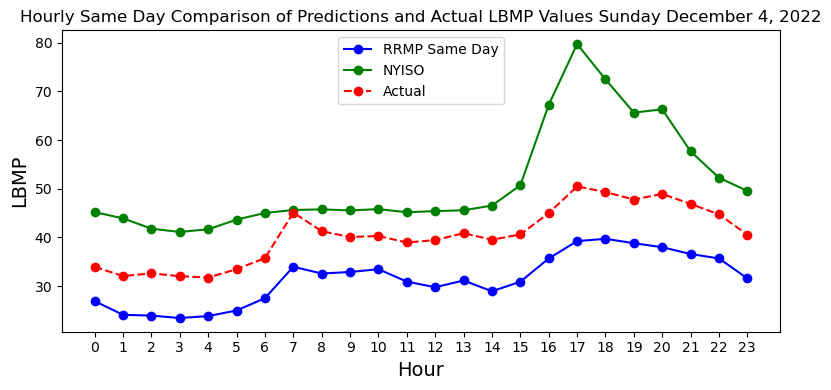

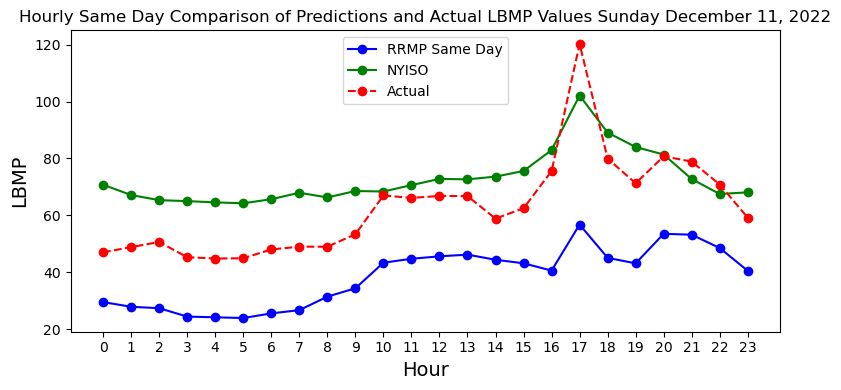

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('RRMP_With_NYISO.csv')
data = df[(df['Date'] == '2022-12-04')]

# Extract relevant columns
hours = data['Hour']
RRMP_predictions = data['RRMP_Same_Day_Predict']
ISO_predictions = data['NYISO_Predict']
actual_values = data['Actual']


# Plotting
plt.figure(figsize=(8, 4))

# Plot predictions with solid lines
plt.plot(hours, RRMP_predictions, marker='o', linestyle='-', color='b', label='RRMP Same Day')
plt.plot(hours, ISO_predictions, marker='o', linestyle='-', color='g', label='NYISO')

# Plot actual values with dashed line
plt.plot(hours, actual_values, marker='o', linestyle='--', color='r', label='Actual')

# Add labels and title
plt.xlabel('Hour',fontsize=14)
plt.ylabel('LBMP',fontsize=14)
plt.title('Hourly Same Day Comparison of Predictions and Actual LBMP Values Sunday December 4, 2022')
plt.xticks(hours)
plt.legend(loc='upper center')  # Adjust legend position as needed

# Customize plot
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().set_facecolor('white')
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()


df= pd.read_csv('RRMP_With_NYISO.csv')
data = df[(df['Date'] == '2022-12-11')]

# Extract relevant columns
hours = data['Hour']
RRMP_predictions = data['RRMP_Same_Day_Predict']
ISO_predictions = data['NYISO_Predict']
actual_values = data['Actual']


# Plotting
plt.figure(figsize=(8, 4))

# Plot predictions with solid lines
plt.plot(hours, RRMP_predictions, marker='o', linestyle='-', color='b', label='RRMP Same Day')
plt.plot(hours, ISO_predictions, marker='o', linestyle='-', color='g', label='NYISO')

# Plot actual values with dashed line
plt.plot(hours, actual_values, marker='o', linestyle='--', color='r', label='Actual')

# Add labels and title
plt.xlabel('Hour',fontsize=14)
plt.ylabel('LBMP', fontsize=14)
plt.title('Hourly Same Day Comparison of Predictions and Actual LBMP Values Sunday December 11, 2022')
plt.xticks(hours)
plt.legend(loc='upper center')  # Adjust legend position as needed

# Customize plot
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().set_facecolor('white')
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()

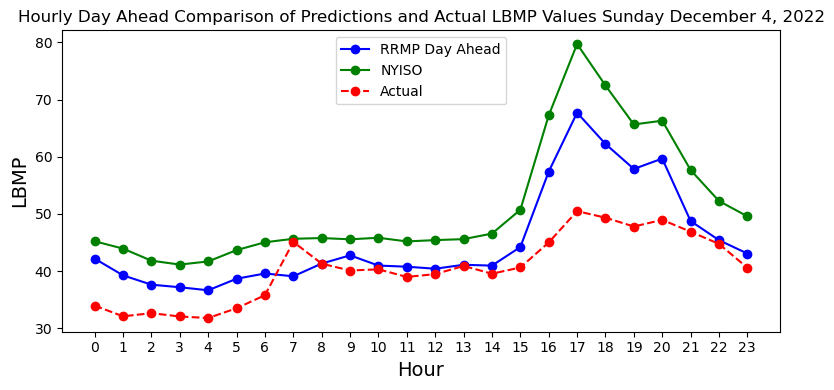

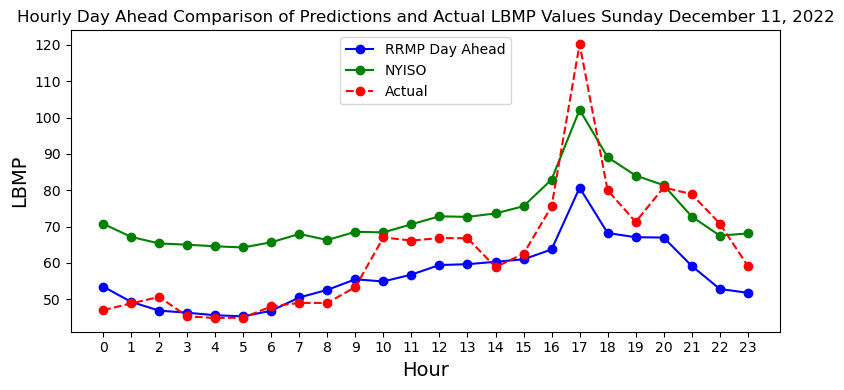

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('RRMP_With_NYISO.csv')
data = df[(df['Date'] == '2022-12-04')]

# Extract relevant columns
hours = data['Hour']
RRMP_predictions = data['RRMP_Day_Ahead_Predict']
ISO_predictions = data['NYISO_Predict']
actual_values = data['Actual']


# Plotting
plt.figure(figsize=(8, 4))

# Plot predictions with solid lines
plt.plot(hours, RRMP_predictions, marker='o', linestyle='-', color='b', label='RRMP Day Ahead')
plt.plot(hours, ISO_predictions, marker='o', linestyle='-', color='g', label='NYISO')

# Plot actual values with dashed line
plt.plot(hours, actual_values, marker='o', linestyle='--', color='r', label='Actual')

# Add labels and title
plt.xlabel('Hour',fontsize=14)
plt.ylabel('LBMP', fontsize=14)
plt.title('Hourly Day Ahead Comparison of Predictions and Actual LBMP Values Sunday December 4, 2022')
plt.xticks(hours)
plt.legend(loc='upper center')  # Adjust legend position as needed

# Customize plot
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().set_facecolor('white')
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()


df= pd.read_csv('RRMP_With_NYISO.csv')
data = df[(df['Date'] == '2022-12-11')]

# Extract relevant columns
hours = data['Hour']
RRMP_predictions = data['RRMP_Day_Ahead_Predict']
ISO_predictions = data['NYISO_Predict']
actual_values = data['Actual']


# Plotting
plt.figure(figsize=(8, 4))

# Plot predictions with solid lines
plt.plot(hours, RRMP_predictions, marker='o', linestyle='-', color='b', label='RRMP Day Ahead')
plt.plot(hours, ISO_predictions, marker='o', linestyle='-', color='g', label='NYISO')

# Plot actual values with dashed line
plt.plot(hours, actual_values, marker='o', linestyle='--', color='r', label='Actual')

# Add labels and title
plt.xlabel('Hour', fontsize=14)
plt.ylabel('LBMP', fontsize=14)
plt.title('Hourly Day Ahead Comparison of Predictions and Actual LBMP Values Sunday December 11, 2022')
plt.xticks(hours)
plt.legend(loc='upper center')  # Adjust legend position as needed

# Customize plot
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().set_facecolor('white')
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()

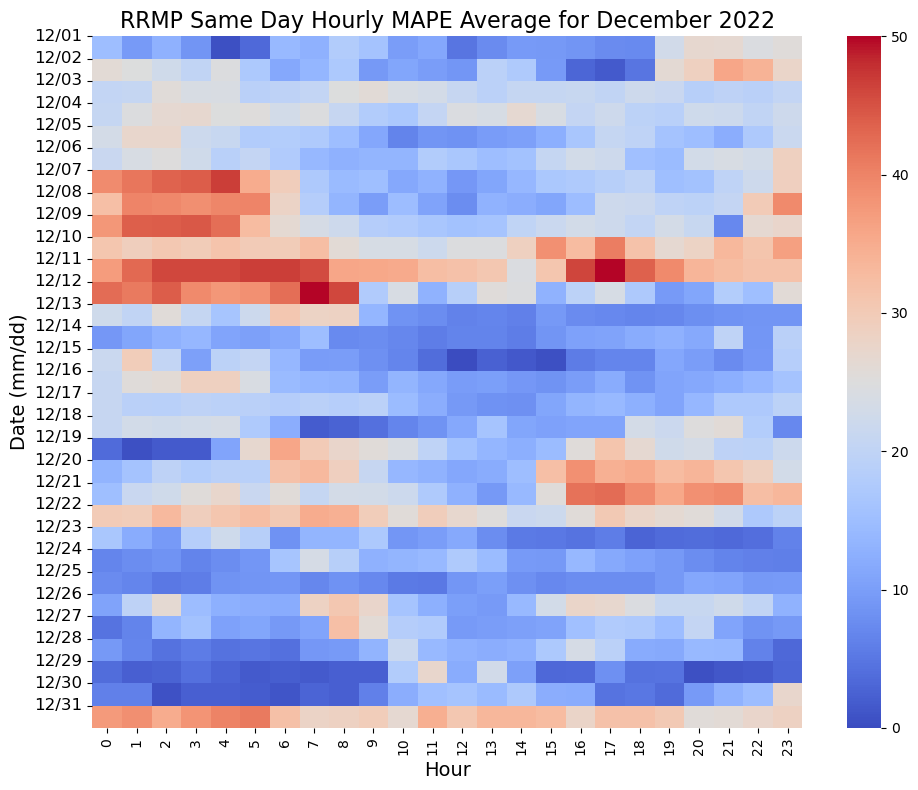

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('RRMP_With_NYISO.csv')

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for December 2022
RRMP_2022_data = df[(df['Date'].dt.year == 2022) & (df['Date'].dt.month == 12)]

# Extract required columns for heatmap (Hour, Date, MAPE_mdyR)
heatmap_data = RRMP_2022_data[['Hour', 'Date', 'RRMP_Same_Day_MAPE']]

# Pivot the table to prepare for heatmap plotting
heatmap_pivot = heatmap_data.pivot_table(index='Date', columns='Hour', values='RRMP_Same_Day_MAPE', aggfunc='mean')

# Plotting heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(heatmap_pivot, annot=False, cmap='coolwarm', cbar=True, vmin=0, vmax=50, cbar_kws={'ticks': [0, 10, 20, 30, 40, 50]})

# Customize x-axis (hours) and y-axis (dates in mm/dd format)
plt.xticks(rotation=90)  # Rotate x-axis labels (hours)
plt.yticks(ticks=range(len(heatmap_pivot.index)), labels=heatmap_pivot.index.strftime('%m/%d'), fontsize=12)  # Format y-axis labels as mm/dd

# Add labels and title
plt.title('RRMP Same Day Hourly MAPE Average for December 2022',fontsize=16)
plt.xlabel('Hour',fontsize=14)
plt.ylabel('Date (mm/dd)',fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


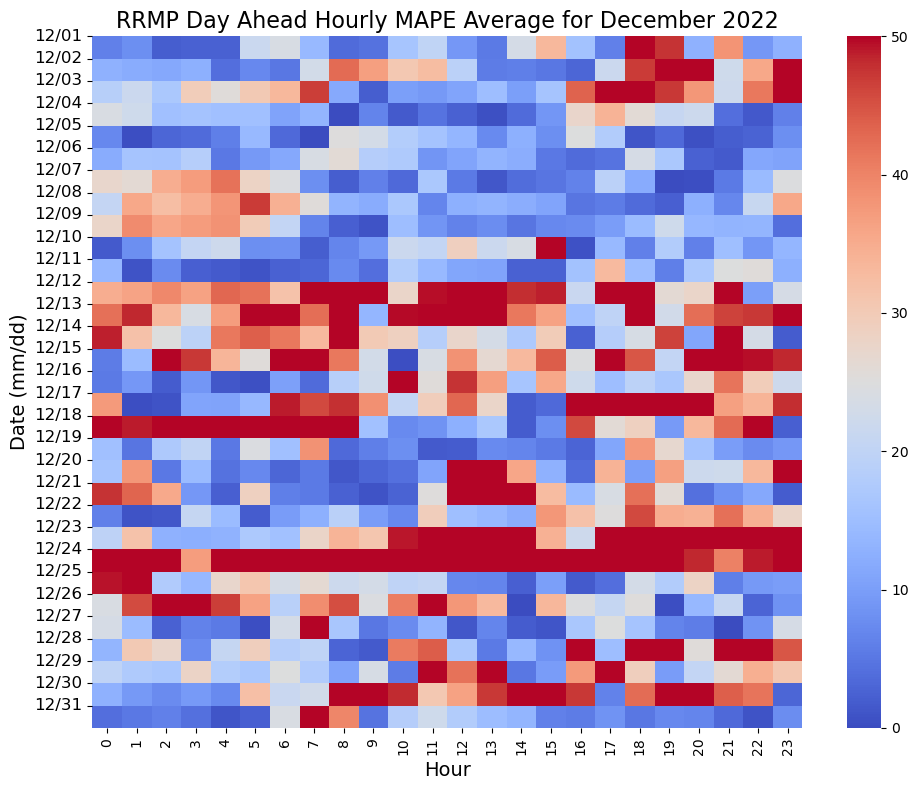

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('RRMP_With_NYISO.csv')

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for December 2022
RRMP_2022_data = df[(df['Date'].dt.year == 2022) & (df['Date'].dt.month == 12)]

# Extract required columns for heatmap (Hour, Date, MAPE_mdyR)
heatmap_data = RRMP_2022_data[['Hour', 'Date', 'RRMP_Day_Ahead_MAPE']]

# Pivot the table to prepare for heatmap plotting
heatmap_pivot = heatmap_data.pivot_table(index='Date', columns='Hour', values='RRMP_Day_Ahead_MAPE', aggfunc='mean')

# Plotting heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(heatmap_pivot, annot=False, cmap='coolwarm', cbar=True, vmin=0, vmax=50, cbar_kws={'ticks': [0, 10, 20, 30, 40, 50]})

# Customize x-axis (hours) and y-axis (dates in mm/dd format)
plt.xticks(rotation=90)  # Rotate x-axis labels (hours)
plt.yticks(ticks=range(len(heatmap_pivot.index)), labels=heatmap_pivot.index.strftime('%m/%d'), fontsize=12)  # Format y-axis labels as mm/dd

# Add labels and title
plt.title('RRMP Day Ahead Hourly MAPE Average for December 2022',fontsize=16)
plt.xlabel('Hour',fontsize=14)
plt.ylabel('Date (mm/dd)',fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


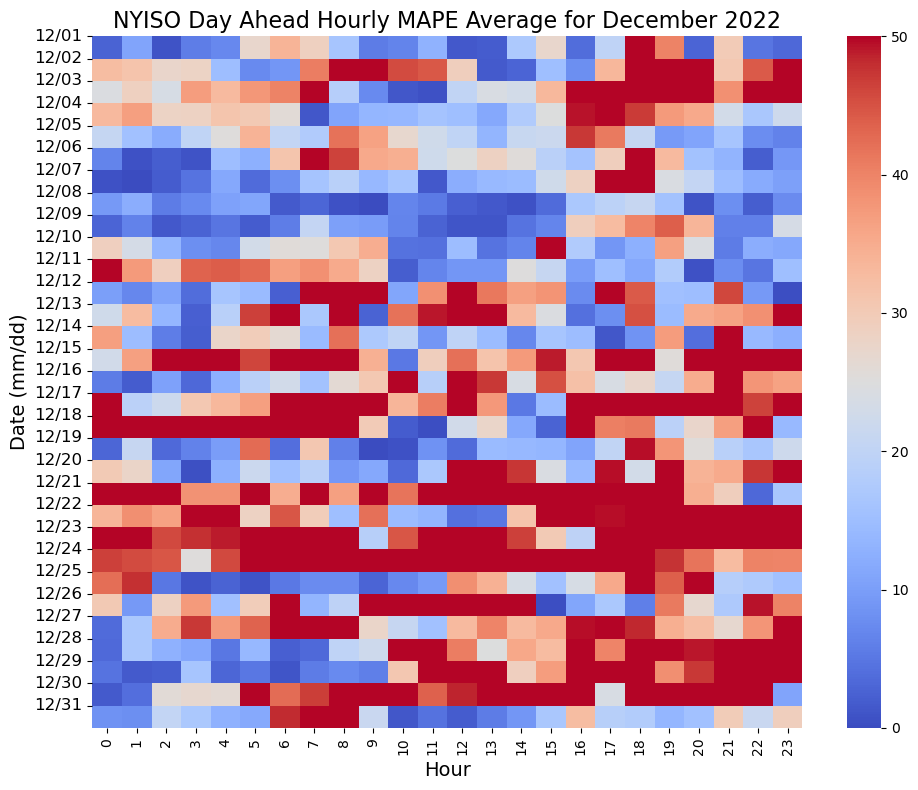

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('RRMP_With_NYISO.csv')

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for December 2022
RRMP_2022_data = df[(df['Date'].dt.year == 2022) & (df['Date'].dt.month == 12)]

# Extract required columns for heatmap (Hour, Date, MAPE_mdyR)
heatmap_data = RRMP_2022_data[['Hour', 'Date', 'NYISO_MAPE']]

# Pivot the table to prepare for heatmap plotting
heatmap_pivot = heatmap_data.pivot_table(index='Date', columns='Hour', values='NYISO_MAPE', aggfunc='mean')

# Plotting heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(heatmap_pivot, annot=False, cmap='coolwarm', cbar=True, vmin=0, vmax=50, cbar_kws={'ticks': [0, 10, 20, 30, 40, 50]})

# Customize x-axis (hours) and y-axis (dates in mm/dd format)
plt.xticks(rotation=90)  # Rotate x-axis labels (hours)
plt.yticks(ticks=range(len(heatmap_pivot.index)), labels=heatmap_pivot.index.strftime('%m/%d'), fontsize=12)  # Format y-axis labels as mm/dd

# Add labels and title
plt.title('NYISO Day Ahead Hourly MAPE Average for December 2022',fontsize=16)
plt.xlabel('Hour',fontsize=14)
plt.ylabel('Date (mm/dd)',fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


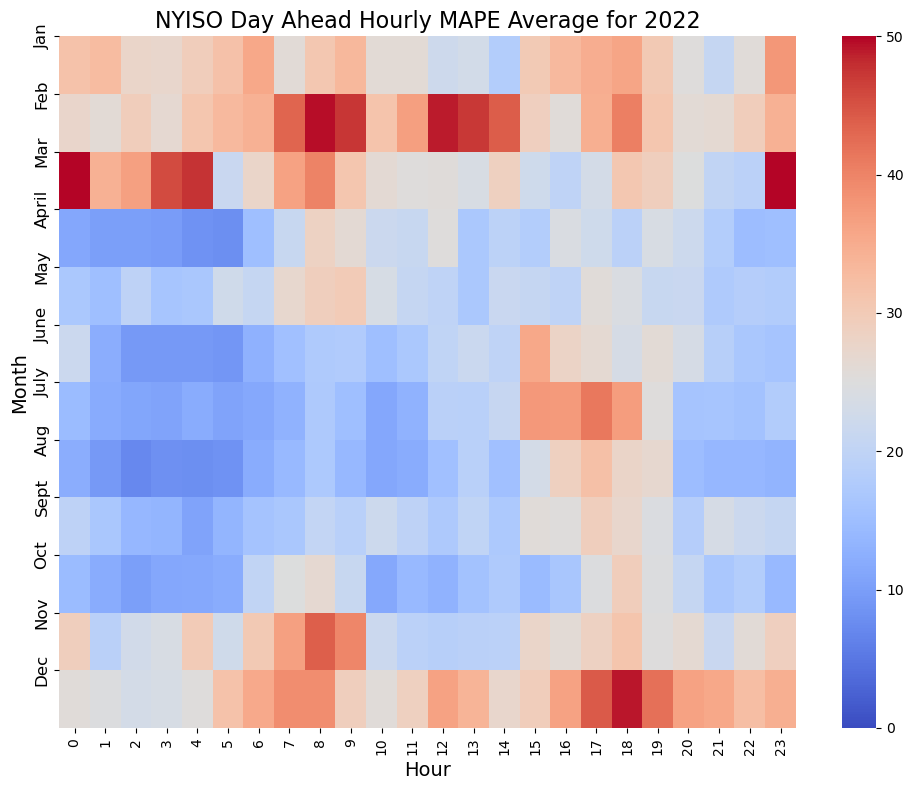

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('RRMP_With_NYISO.csv')

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract year 2022 data
year_2022_data = df[df['Date'].dt.year == 2022]

# Extract month from 'Date' column
year_2022_data['Month'] = year_2022_data['Date'].dt.month

# Pivot the table to prepare for heatmap plotting
heatmap_pivot = year_2022_data.pivot_table(index='Month', columns='Hour', values='NYISO_MAPE', aggfunc='mean')

# Plotting heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(heatmap_pivot, annot=False, cmap='coolwarm', cbar=True, vmin=0, vmax=50, cbar_kws={'ticks': [0, 10, 20, 30, 40, 50]})

# Customize x-axis (hours) and y-axis (months)
plt.xticks(rotation=90)  # Rotate x-axis labels (hours)

# Set y-axis labels to display month names
plt.yticks(ticks=range(len(heatmap_pivot.index)), labels=['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 
                                                         'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], fontsize=12)

# Add labels and title
plt.title('NYISO Day Ahead Hourly MAPE Average for 2022',fontsize=16)
plt.xlabel('Hour',fontsize=14)
plt.ylabel('Month',fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


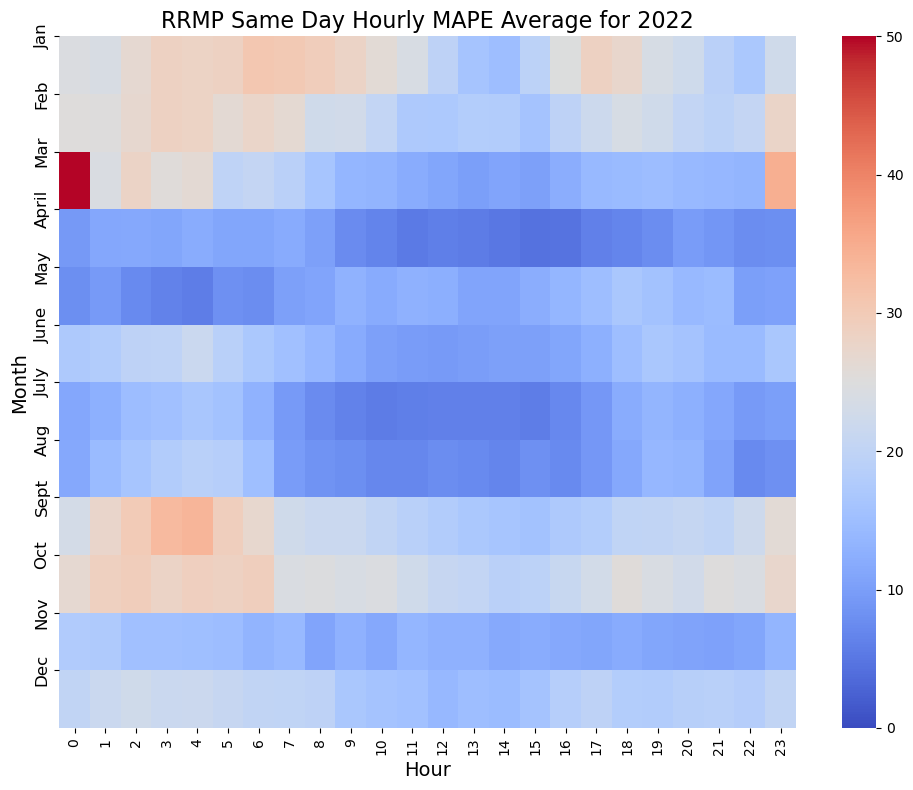

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('RRMP_With_NYISO.csv')

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract year 2022 data
year_2022_data = df[df['Date'].dt.year == 2022]

# Extract month from 'Date' column
year_2022_data['Month'] = year_2022_data['Date'].dt.month

# Pivot the table to prepare for heatmap plotting
heatmap_pivot = year_2022_data.pivot_table(index='Month', columns='Hour', values='RRMP_Same_Day_MAPE', aggfunc='mean')

# Plotting heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(heatmap_pivot, annot=False, cmap='coolwarm', cbar=True, vmin=0, vmax=50, cbar_kws={'ticks': [0, 10, 20, 30, 40, 50]})

# Customize x-axis (hours) and y-axis (months)
plt.xticks(rotation=90)  # Rotate x-axis labels (hours)

# Set y-axis labels to display month names
plt.yticks(ticks=range(len(heatmap_pivot.index)), labels=['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 
                                                         'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], fontsize=12)

# Add labels and title
plt.title('RRMP Same Day Hourly MAPE Average for 2022',fontsize=16)
plt.xlabel('Hour',fontsize=14)
plt.ylabel('Month',fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


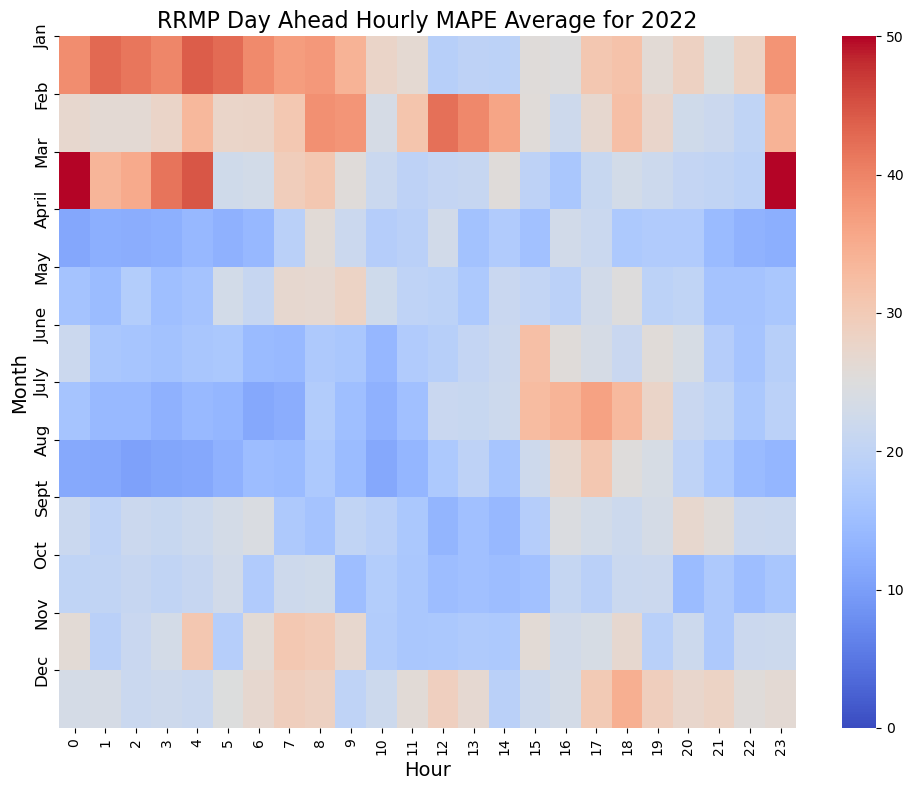

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('RRMP_With_NYISO.csv')

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract year 2022 data
year_2022_data = df[df['Date'].dt.year == 2022]

# Extract month from 'Date' column
year_2022_data['Month'] = year_2022_data['Date'].dt.month

# Pivot the table to prepare for heatmap plotting
heatmap_pivot = year_2022_data.pivot_table(index='Month', columns='Hour', values='RRMP_Day_Ahead_MAPE', aggfunc='mean')

# Plotting heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(heatmap_pivot, annot=False, cmap='coolwarm', cbar=True, vmin=0, vmax=50, cbar_kws={'ticks': [0, 10, 20, 30, 40, 50]})

# Customize x-axis (hours) and y-axis (months)
plt.xticks(rotation=90)  # Rotate x-axis labels (hours)

# Set y-axis labels to display month names
plt.yticks(ticks=range(len(heatmap_pivot.index)), labels=['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 
                                                         'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],fontsize=12)

# Add labels and title
plt.title('RRMP Day Ahead Hourly MAPE Average for 2022',fontsize=16)
plt.xlabel('Hour',fontsize=14)
plt.ylabel('Month',fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


In [136]:
import pandas as pd

# Load your dataset
df = pd.read_csv('RRMP_With_NYISO.csv')

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the year 2022
df_2022 = df[df['Date'].dt.year == 2022]

# Filter data for December 2022
df_december_2022 = df_2022[df_2022['Date'].dt.month == 12]

# Calculate the December averages
december_avg = {
    'RRMP_Same_Day_MAPE': df_december_2022['RRMP_Same_Day_MAPE'].mean(),
    'RRMP_Day_Ahead_MAPE': df_december_2022['RRMP_Day_Ahead_MAPE'].mean(),
    'NYISO_MAPE': df_december_2022['NYISO_MAPE'].mean()
}

# Calculate the yearly averages
yearly_avg = {
    'RRMP_Same_Day_MAPE': df_2022['RRMP_Same_Day_MAPE'].mean(),
    'RRMP_Day_Ahead_MAPE': df_2022['RRMP_Day_Ahead_MAPE'].mean(),
    'NYISO_MAPE': df_2022['NYISO_MAPE'].mean()
}

# Print the results
print("December 2022 Averages:")
for key, value in december_avg.items():
    print(f"{key}: {value:.2f}")

print("\n2022 Yearly Averages:")
for key, value in yearly_avg.items():
    print(f"{key}: {value:.2f}")


December 2022 Averages:
RRMP_Same_Day_MAPE: 18.56
RRMP_Day_Ahead_MAPE: 25.43
NYISO_MAPE: 32.88

2022 Yearly Averages:
RRMP_Same_Day_MAPE: 16.72
RRMP_Day_Ahead_MAPE: 24.11
NYISO_MAPE: 25.72


In [138]:
import pandas as pd

# Load your dataset
df = pd.read_csv('RRMP_With_NYISO.csv')

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the year 2022
df_2022 = df[df['Date'].dt.year == 2022]

# Calculate the monthly averages
monthly_avg = df_2022.groupby(df_2022['Date'].dt.month).agg({
    'RRMP_Same_Day_MAPE': 'mean',
    'RRMP_Day_Ahead_MAPE': 'mean',
    'NYISO_MAPE': 'mean'
}).rename_axis('Month').reset_index()

# Calculate the yearly averages
yearly_avg = {
    'RRMP_Same_Day_MAPE': df_2022['RRMP_Same_Day_MAPE'].mean(),
    'RRMP_Day_Ahead_MAPE': df_2022['RRMP_Day_Ahead_MAPE'].mean(),
    'NYISO_MAPE': df_2022['NYISO_MAPE'].mean()
}

# Print the monthly averages
print("Monthly Averages for 2022:")
for index, row in monthly_avg.iterrows():
    print(f"Month {int(row['Month']):02d}:")
    print(f"  RRMP_Same_Day_MAPE: {row['RRMP_Same_Day_MAPE']:.2f}")
    print(f"  RRMP_Day_Ahead_MAPE: {row['RRMP_Day_Ahead_MAPE']:.2f}")
    print(f"  NYISO_MAPE: {row['NYISO_MAPE']:.2f}")

# Print the yearly averages
print("\n2022 Yearly Averages:")
for key, value in yearly_avg.items():
    print(f"{key}: {value:.2f}")


Monthly Averages for 2022:
Month 01:
  RRMP_Same_Day_MAPE: 24.36
  RRMP_Day_Ahead_MAPE: 32.05
  NYISO_MAPE: 28.97
Month 02:
  RRMP_Same_Day_MAPE: 22.62
  RRMP_Day_Ahead_MAPE: 29.51
  NYISO_MAPE: 34.73
Month 03:
  RRMP_Same_Day_MAPE: 20.21
  RRMP_Day_Ahead_MAPE: 48.28
  NYISO_MAPE: 56.88
Month 04:
  RRMP_Same_Day_MAPE: 8.27
  RRMP_Day_Ahead_MAPE: 16.74
  NYISO_MAPE: 17.94
Month 05:
  RRMP_Same_Day_MAPE: 11.14
  RRMP_Day_Ahead_MAPE: 20.03
  NYISO_MAPE: 20.98
Month 06:
  RRMP_Same_Day_MAPE: 14.54
  RRMP_Day_Ahead_MAPE: 19.31
  NYISO_MAPE: 18.44
Month 07:
  RRMP_Same_Day_MAPE: 10.12
  RRMP_Day_Ahead_MAPE: 19.82
  NYISO_MAPE: 18.97
Month 08:
  RRMP_Same_Day_MAPE: 10.96
  RRMP_Day_Ahead_MAPE: 16.73
  NYISO_MAPE: 15.73
Month 09:
  RRMP_Same_Day_MAPE: 22.48
  RRMP_Day_Ahead_MAPE: 20.54
  NYISO_MAPE: 19.64
Month 10:
  RRMP_Same_Day_MAPE: 24.69
  RRMP_Day_Ahead_MAPE: 18.51
  NYISO_MAPE: 17.30
Month 11:
  RRMP_Same_Day_MAPE: 13.05
  RRMP_Day_Ahead_MAPE: 22.44
  NYISO_MAPE: 26.49
Month 12:
  RRMP_

In [151]:
# Define MAPE values
NYISO_mape = 
RRMP_mape = 

# Calculate MAPE savings
mape_savings = ((NYISO_mape - RRMP_mape) / NYISO_mape) * 100

print(f"MAPE Savings: {mape_savings:.2f}%")


SyntaxError: invalid syntax (2354253090.py, line 2)

In [3]:
import pandas as pd

# Load your dataset
df = pd.read_csv('RRMP_With_NYISO.csv')

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the year 2022
df_2022 = df[df['Date'].dt.year == 2022]

# Calculate the monthly averages
monthly_avg = df_2022.groupby(df_2022['Date'].dt.month).agg({
    'RRMP_Same_Day_MAPE': 'mean',
    'RRMP_Day_Ahead_MAPE': 'mean',
    'NYISO_MAPE': 'mean'
}).rename_axis('Month').reset_index()

# Calculate the yearly averages
yearly_avg = {
    'RRMP_Same_Day_MAPE': df_2022['RRMP_Same_Day_MAPE'].mean(),
    'RRMP_Day_Ahead_MAPE': df_2022['RRMP_Day_Ahead_MAPE'].mean(),
    'NYISO_MAPE': df_2022['NYISO_MAPE'].mean()
}

# Calculate MAPE savings for each month
monthly_avg['MAPE_Savings'] = ((monthly_avg['NYISO_MAPE'] - monthly_avg['RRMP_Day_Ahead_MAPE']) / monthly_avg['NYISO_MAPE']) * 100

# Calculate MAPE savings for the year
yearly_mape_savings = ((yearly_avg['NYISO_MAPE'] - yearly_avg['RRMP_Day_Ahead_MAPE']) / yearly_avg['NYISO_MAPE']) * 100

# Print the monthly averages and savings
print("Monthly Averages for 2022:")
for index, row in monthly_avg.iterrows():
    print(f"Month {int(row['Month']):02d}:")
    print(f"  RRMP_Same_Day_MAPE: {row['RRMP_Same_Day_MAPE']:.2f}")
    print(f"  RRMP_Day_Ahead_MAPE: {row['RRMP_Day_Ahead_MAPE']:.2f}")
    print(f"  NYISO_MAPE: {row['NYISO_MAPE']:.2f}")
    print(f"  MAPE_Savings: {row['MAPE_Savings']:.2f}%")

# Print the yearly averages and savings
print("\n2022 Yearly Averages:")
for key, value in yearly_avg.items():
    print(f"{key}: {value:.2f}")

print(f"\nYearly MAPE Savings: {yearly_mape_savings:.2f}%")


Monthly Averages for 2022:
Month 01:
  RRMP_Same_Day_MAPE: 24.36
  RRMP_Day_Ahead_MAPE: 32.05
  NYISO_MAPE: 28.97
  MAPE_Savings: -10.62%
Month 02:
  RRMP_Same_Day_MAPE: 22.62
  RRMP_Day_Ahead_MAPE: 29.51
  NYISO_MAPE: 34.73
  MAPE_Savings: 15.04%
Month 03:
  RRMP_Same_Day_MAPE: 20.21
  RRMP_Day_Ahead_MAPE: 48.28
  NYISO_MAPE: 56.88
  MAPE_Savings: 15.13%
Month 04:
  RRMP_Same_Day_MAPE: 8.27
  RRMP_Day_Ahead_MAPE: 16.74
  NYISO_MAPE: 17.94
  MAPE_Savings: 6.70%
Month 05:
  RRMP_Same_Day_MAPE: 11.14
  RRMP_Day_Ahead_MAPE: 20.03
  NYISO_MAPE: 20.98
  MAPE_Savings: 4.52%
Month 06:
  RRMP_Same_Day_MAPE: 14.54
  RRMP_Day_Ahead_MAPE: 19.31
  NYISO_MAPE: 18.44
  MAPE_Savings: -4.74%
Month 07:
  RRMP_Same_Day_MAPE: 10.12
  RRMP_Day_Ahead_MAPE: 19.82
  NYISO_MAPE: 18.97
  MAPE_Savings: -4.48%
Month 08:
  RRMP_Same_Day_MAPE: 10.96
  RRMP_Day_Ahead_MAPE: 16.73
  NYISO_MAPE: 15.73
  MAPE_Savings: -6.40%
Month 09:
  RRMP_Same_Day_MAPE: 22.48
  RRMP_Day_Ahead_MAPE: 20.54
  NYISO_MAPE: 19.64
  MAPE_S

In [155]:
import pandas as pd

# Load your dataset
df = pd.read_csv('RRMP_With_NYISO.csv')

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the year 2022
df_2022 = df[df['Date'].dt.year == 2022]

# Calculate the average hourly MAPE for each hour
hourly_avg = df_2022.groupby('Hour').agg({
    'RRMP_Same_Day_MAPE': 'mean',
    'RRMP_Day_Ahead_MAPE': 'mean',
    'NYISO_MAPE': 'mean'
}).reset_index()

# Calculate MAPE savings for each hour
hourly_avg['MAPE_Savings'] = ((hourly_avg['NYISO_MAPE'] - hourly_avg['RRMP_Day_Ahead_MAPE']) / hourly_avg['NYISO_MAPE']) * 100

# Print the hourly averages and savings
print("Hourly Averages for 2022:")
for index, row in hourly_avg.iterrows():
    print(f"Hour {int(row['Hour']):02d}:")
    print(f"  RRMP_Same_Day_MAPE: {row['RRMP_Same_Day_MAPE']:.2f}")
    print(f"  RRMP_Day_Ahead_MAPE: {row['RRMP_Day_Ahead_MAPE']:.2f}")
    print(f"  NYISO_MAPE: {row['NYISO_MAPE']:.2f}")
    print(f"  MAPE_Savings: {row['MAPE_Savings']:.2f}%")

# If you want to save the results to a CSV file
hourly_avg.to_csv('Hourly_MAPE_Averages_2022.csv', index=False)
print("\nHourly MAPE averages and savings saved to 'Hourly_MAPE_Averages_2022.csv'.")


Hourly Averages for 2022:
Hour 00:
  RRMP_Same_Day_MAPE: 24.06
  RRMP_Day_Ahead_MAPE: 56.85
  NYISO_MAPE: 64.59
  MAPE_Savings: 11.99%
Hour 01:
  RRMP_Same_Day_MAPE: 19.44
  RRMP_Day_Ahead_MAPE: 21.19
  NYISO_MAPE: 18.66
  MAPE_Savings: -13.53%
Hour 02:
  RRMP_Same_Day_MAPE: 20.60
  RRMP_Day_Ahead_MAPE: 21.61
  NYISO_MAPE: 18.28
  MAPE_Savings: -18.22%
Hour 03:
  RRMP_Same_Day_MAPE: 20.89
  RRMP_Day_Ahead_MAPE: 21.93
  NYISO_MAPE: 18.81
  MAPE_Savings: -16.55%
Hour 04:
  RRMP_Same_Day_MAPE: 21.33
  RRMP_Day_Ahead_MAPE: 24.06
  NYISO_MAPE: 19.93
  MAPE_Savings: -20.72%
Hour 05:
  RRMP_Same_Day_MAPE: 19.98
  RRMP_Day_Ahead_MAPE: 21.75
  NYISO_MAPE: 18.62
  MAPE_Savings: -16.83%
Hour 06:
  RRMP_Same_Day_MAPE: 19.30
  RRMP_Day_Ahead_MAPE: 21.70
  NYISO_MAPE: 22.58
  MAPE_Savings: 3.91%
Hour 07:
  RRMP_Same_Day_MAPE: 17.73
  RRMP_Day_Ahead_MAPE: 23.54
  NYISO_MAPE: 26.01
  MAPE_Savings: 9.51%
Hour 08:
  RRMP_Same_Day_MAPE: 16.30
  RRMP_Day_Ahead_MAPE: 25.68
  NYISO_MAPE: 29.83
  MAPE_Saving

In [6]:
import pandas as pd

# Load your dataset
df = pd.read_csv('RRMP_With_NYISO.csv')

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for December 2022
df_2022_december = df[(df['Date'].dt.year == 2022) & (df['Date'].dt.month == 12)]

# Calculate the average hourly MAPE for each hour
hourly_avg = df_2022_december.groupby('Hour').agg({
    'RRMP_Same_Day_MAPE': 'mean',
    'RRMP_Day_Ahead_MAPE': 'mean',
    'NYISO_MAPE': 'mean'
}).reset_index()

# Calculate MAPE savings for each hour
hourly_avg['MAPE_Savings'] = ((hourly_avg['NYISO_MAPE'] - hourly_avg['RRMP_Day_Ahead_MAPE']) / hourly_avg['NYISO_MAPE']) 

# Print the hourly averages and savings
print("Hourly Averages for December 2022:")
for index, row in hourly_avg.iterrows():
    print(f"Hour {int(row['Hour']):02d}:")
    print(f"  RRMP_Same_Day_MAPE: {row['RRMP_Same_Day_MAPE']:.2f}")
    print(f"  RRMP_Day_Ahead_MAPE: {row['RRMP_Day_Ahead_MAPE']:.2f}")
    print(f"  NYISO_MAPE: {row['NYISO_MAPE']:.2f}")
    print(f"  MAPE_Savings: {row['MAPE_Savings']:.2f}%")

# If you want to save the results to a CSV file
hourly_avg.to_csv('Hourly_MAPE_Averages_December2022.csv', index=False)
print("\nHourly MAPE averages and savings saved to 'Hourly_MAPE_Averages_December2022.csv'.")


Hourly Averages for December 2022:
Hour 00:
  RRMP_Same_Day_MAPE: 20.23
  RRMP_Day_Ahead_MAPE: 23.26
  NYISO_MAPE: 25.62
  MAPE_Savings: 0.09%
Hour 01:
  RRMP_Same_Day_MAPE: 21.67
  RRMP_Day_Ahead_MAPE: 23.49
  NYISO_MAPE: 24.70
  MAPE_Savings: 0.05%
Hour 02:
  RRMP_Same_Day_MAPE: 22.47
  RRMP_Day_Ahead_MAPE: 21.50
  NYISO_MAPE: 23.08
  MAPE_Savings: 0.07%
Hour 03:
  RRMP_Same_Day_MAPE: 21.59
  RRMP_Day_Ahead_MAPE: 22.26
  NYISO_MAPE: 23.75
  MAPE_Savings: 0.06%
Hour 04:
  RRMP_Same_Day_MAPE: 21.79
  RRMP_Day_Ahead_MAPE: 21.53
  NYISO_MAPE: 25.32
  MAPE_Savings: 0.15%
Hour 05:
  RRMP_Same_Day_MAPE: 20.91
  RRMP_Day_Ahead_MAPE: 24.96
  NYISO_MAPE: 31.60
  MAPE_Savings: 0.21%
Hour 06:
  RRMP_Same_Day_MAPE: 20.16
  RRMP_Day_Ahead_MAPE: 26.86
  NYISO_MAPE: 35.47
  MAPE_Savings: 0.24%
Hour 07:
  RRMP_Same_Day_MAPE: 20.07
  RRMP_Day_Ahead_MAPE: 29.16
  NYISO_MAPE: 38.92
  MAPE_Savings: 0.25%
Hour 08:
  RRMP_Same_Day_MAPE: 19.57
  RRMP_Day_Ahead_MAPE: 28.54
  NYISO_MAPE: 38.98
  MAPE_Savings:

In [165]:
import pandas as pd

# Load your dataset
df = pd.read_csv('RRMP_With_NYISO.csv')

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the year 2022
df_2022 = df[df['Date'].dt.year == 2022]

# Extract month
df_2022['Month'] = df_2022['Date'].dt.month

# Calculate the average RRMP_Day_Ahead_MAPE for each month
monthly_avg = df_2022.groupby('Month').agg({
    'RRMP_Day_Ahead_MAPE': 'mean'
}).reset_index()

# Find the month with the lowest RRMP_Day_Ahead_MAPE
lowest_mape_row = monthly_avg.loc[monthly_avg['RRMP_Day_Ahead_MAPE'].idxmin()]

# Print the results
print("Month with Lowest RRMP_Day_Ahead_MAPE:")
print(f"Month: {int(lowest_mape_row['Month']):02d}")
print(f"Average RRMP_Day_Ahead_MAPE: {lowest_mape_row['RRMP_Day_Ahead_MAPE']:.2f}")




Month with Lowest RRMP_Day_Ahead_MAPE:
Month: 08
Average RRMP_Day_Ahead_MAPE: 16.73


In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('RRMP_With_NYISO.csv')

# Convert 'Date' to datetime to easily extract month and year
df['Date'] = pd.to_datetime(df['Date'])

# Filter the dataset to only include rows where RR_Day_Ahead_MAPE < NYISO_MAPE
filtered_data = df[df['RRMP_Day_Ahead_MAPE'] < df['NYISO_MAPE']]

# Create a new column 'Month' to store the month information
filtered_data['Month'] = filtered_data['Date'].dt.month

# Count the occurrences of hours where RR_Day_Ahead_MAPE < NYISO_MAPE for each month
hours_per_month = filtered_data.groupby('Month')['Hour'].count()

# Find the month with the most hours
max_hours_month = hours_per_month.idxmax()

# Output the results
print(f"The month with the most hours where RRMP_Day_Ahead_MAPE < NYISO_MAPE is: {max_hours_month}")
print(f"Number of such hours: {hours_per_month[max_hours_month]}")


The month with the most hours where RRMP_Day_Ahead_MAPE < NYISO_MAPE is: 12
Number of such hours: 469


C:\Users\jolen\AppData\Local\Temp\ipykernel_22504\1151182012.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Month'] = filtered_data['Date'].dt.month


In [64]:
import pandas as pd

# Load the dataset
df = pd.read_csv('RRMP_With_NYISO.csv')

# Convert 'Date' column to datetime for easier manipulation
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for December (Month == 12)
december_data = df[df['Date'].dt.month == 12]

# Create a new column 'Day_of_Week' to store the day of the week (e.g., Monday, Tuesday)
december_data['Day_of_Week'] = december_data['Date'].dt.day_name()

# Group by 'Day_of_Week' and calculate the mean MAPE for each day
day_of_week_mape = december_data.groupby('Day_of_Week')['RRMP_Day_Ahead_MAPE'].mean()

# Find the day with the lowest mean MAPE
lowest_mape_day = day_of_week_mape.idxmin()
lowest_mape_value = day_of_week_mape.min()

# Output the results
print(f"The day of the week in December with the lowest MAPE is: {lowest_mape_day}")
print(f"Lowest MAPE value: {lowest_mape_value:.2f}")


The day of the week in December with the lowest MAPE is: Sunday
Lowest MAPE value: 20.79


C:\Users\jolen\AppData\Local\Temp\ipykernel_22504\3371271644.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  december_data['Day_of_Week'] = december_data['Date'].dt.day_name()


Training sizes: [ 15  30  45  61  76  91 107 122 137 153]
Bias (Validation error):
Training size 15: Bias = 185.7786
Training size 30: Bias = 87.8907
Training size 45: Bias = 29.9481
Training size 61: Bias = 21.5529
Training size 76: Bias = 12.8544
Training size 91: Bias = 6.4724
Training size 107: Bias = 5.4708
Training size 122: Bias = 5.0726
Training size 137: Bias = 4.4183
Training size 153: Bias = 5.8401
Variance (Train - Validation error):
Training size 15: Variance = -177.0120
Training size 30: Variance = -81.2229
Training size 45: Variance = -25.6533
Training size 61: Variance = -18.0218
Training size 76: Variance = -9.9455
Training size 91: Variance = -3.7904
Training size 107: Variance = -3.1525
Training size 122: Variance = -2.6844
Training size 137: Variance = -2.1495
Training size 153: Variance = -2.6743


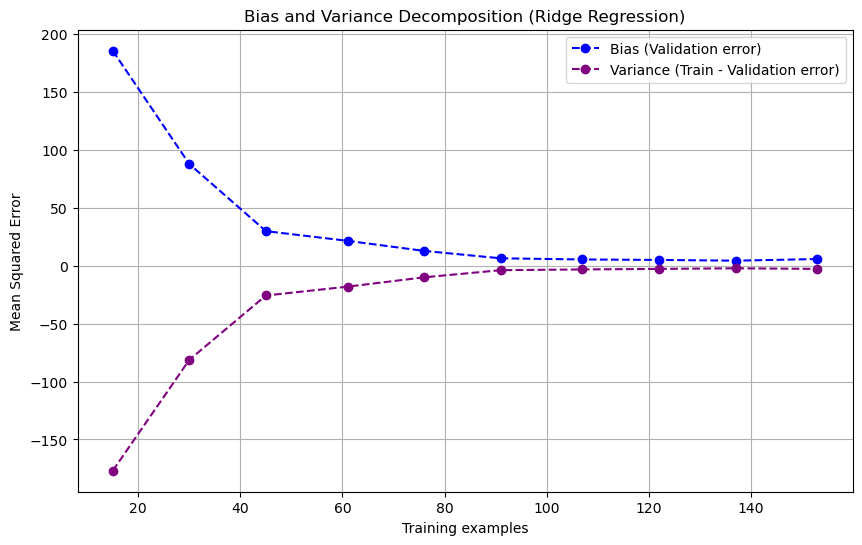

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("61761_Real_Time.csv")

# Filter data for Mondays in January for the years 2020 and 2021
monday_data = df[(df['Month'] == 7) & (df['Day_of_Week'] == 7) & (df['Year'].isin([2020, 2021]))]

# Prepare the feature matrix X and the target variable y
features = ['Hour', 'Marginal Cost Losses', 'Marginal Cost Congestion']
X = monday_data[features].values
y = monday_data['LBMP'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train the Ridge regression model
ridge = Ridge(alpha=4.0)  # You can adjust the alpha parameter for regularization

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    ridge, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Calculate bias and variance
bias = test_scores_mean  # The validation error approximates the bias
variance = train_scores_mean - test_scores_mean  # Gap between training and validation errors

# Print the values used in the chart
print("Training sizes:", train_sizes)
print("Bias (Validation error):")
for size, b in zip(train_sizes, bias):
    print(f"Training size {size}: Bias = {b:.4f}")

print("Variance (Train - Validation error):")
for size, v in zip(train_sizes, variance):
    print(f"Training size {size}: Variance = {v:.4f}")

# Plot the bias and variance
plt.figure(figsize=(10, 6))
plt.title("Bias and Variance Decomposition (Ridge Regression)")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.grid()

# Plot bias and variance
plt.plot(train_sizes, bias, 'o--', color="blue", label="Bias (Validation error)")
plt.plot(train_sizes, variance, 'o--', color="purple", label="Variance (Train - Validation error)")

plt.legend(loc="best")
plt.show()
